# Introduction
This final project for HCDE 410 gives me an opportunity to pursue something I am passionate about - education. I love education. I have been working with the Electrical and Computer Engineering department at the University of Washington to remake the curriculum in a student-friendly manner. The first class runs during the SUMMER 2022 quarter and I will be TAing it! Although my project will not focus directly on teaching techniques, I hope studying how other nations implement education will make me a better TA and give my students a better experience. 

The United States has not been at the forefrunt of education for decades as other nations are more innovative and successful than my home country. Exploring what makes nations effective or innefective will be beneficial for educating those in the United States. I hope to create a strong understanding of which policies and strategies are the most effective in benefitting students. My father has been studying to become a teacher for years, so I already know the basics of how teaching works on a personal level. I would like to learn how teaching works on a larger scale as my redesigning of the Electrical and Computer Engineering curriculum is not only focused at the course level, but also the departmental level. Copying successful national policies will make my department stronger and more student-centered (it is convinient these students are humans as this is a human centered design engineering course).








# Unknowns and dependencies: Are there any factors outside of your control that might impact your ability to complete this project by the end of the quarter? The purpose of this section is to get you thinking, in a practical sense, about your ability to complete this project within the time allotted.
Talking with my classmates helped me pinpoint a large unknown in my project - I need to narrow down the number of columns in my dataset. Most of the datasets have seven columns of information. I will not be using or discussing most of the columns, so noting the importance of the columns I choose to work with will reveal my biases and focus the scope of my work. Unfortunately, I do not know exactly what my project will focus on, but narrowing the scope into something concrete will improve the strength and relevance of my arguments. 

Visualizations help me to see patterns, but creating the visualizations is sometimes difficult. I do not know if I will create my visualizations in Python or R - I suspect it will come down to which language lets me produce the visualizations faster.

## Related Work:
The information I will be talking about comes from Our World in Data (https://documents.worldbank.org/en/publication/documents-reports/documentdetail/706141516721172989/global-data-set-on-education-quality-1965-2015 and https://ourworldindata.org/quality-of-education#teacher-quality). 

Education is inherently complex and riddled with confounding variables. None the less, many politicians believe throwing more money at education guarentees success. Unfortunately, it appears as though education is impacted by more than just money. Cultural aspects impact education as Asia consistently outperforms Europe which consistently outperforms North America (where my home country resides). The different nations focus their spending on different aspects of education. Several nations find success with strong primary education while others focus on tertiary education. The difference between raising everyone up and building an education system to benefit the highest acheivers is largely cultural. 

Focusing on the PISA in my home country of the United States, it appears as though the nation has a large group of students moderately successful, but the difference between the highest performers and the lowest performs is massive. There is over a 600% difference in the scores of the 90th percentile and 10th percentile on the PISA in the United States. Strangely, the United States spends more money yearly but sees the scores of the 90th percentile decrease while the 10th percentile remains unchanged. From 2000 to 2015, the United States saw no change in the 10th percentile scores and a decrease in the 90th percentile scores while spending an additional 1.2% of its GDP (to bring the total to ~7.5%).

Increasing spending and seeing decreasing results is a big reason I want to investigate what fields make a nation effective. I want to increase the effectiveness of the United States Education System by increasing student education and decreasing costs. The saved money can then be used on social programs that will (hopefully) positively compound and further increase the efficiency of the United States Education System.

## Data selected for analysis: 
The data I am using resides in several datasets that preside on the same "Our World in Data" webpage. The Our World in Data webpage is accessible at this link (https://ourworldindata.org/financing-education). The main dataset is part of a research paper written by the World Bank with a public disclosure status. The citation and licensing is viewable at the first link. 

The dataset comparing money spent per student with student performance is excellent in determining countries with effective teaching methods. The data will not tell me why each country is successful, only that a country is successful. With a list of countries that appear as positive outliers, I can investigate the countries and try to find policies that cause their unusual success. I will then compare spending at different levels across the globe - pre-primary, primary, secondary, and tertiary education.

The ethical concerns are minimal, but I need to remember the conclusions I draw are not causal. People are complex, and if a college student could solve the global education crisis alone, someone would have already solved the global education crisis! The relationships I find will hopefully point me in the correct direction, but I need to keep an ethical lense and see the people represented in the dataset as people and not numbers.

# Research Question:
Which level of education (pre-primary, primary, secondary, or tertiary) has the highest correlation to a country's educational success as measured by the PISA in the most recent year data is available, 2014? What are potential causes of this relationship if it is causal?

# Methodology:
My methodology will be simple as the point of the analysis is not to draw conclusions but rather point me to what policies might have the largest impact on student success. To begin, I will join datasets from Our World in Data that contain information on a country's PISA score. To test whether a given field is correlated with student success, I will run a least-squares linear regression to find linear relationships that exist. Once the linear regression is finished, I will plot the fields on a chart that shows strength of correlation and direction of correlation. The key for the plot will contain the names of each field and will be color cordinated with their respective point on the chart. 

Analyzing the correlation between a country's PISA score and money spent per education level and creating a visual to show this value is an appropriate method because no conclusions are drawn. Rather, fields that have a positive correlation and fields that have a negative correlation on student success will be highlighted. Once the fields of interest are determined, further research can be done into understanding if there is any causality, and if so, why. 

# Findings:
Below is my work to attempt to answer the question: which level of education (pre-primary, primary, secondary, or tertiary) has the highest correlation to a country's educational success as measured by the PISA in the most recent year data is available, 2014? What are potential causes of this relationship if it is causal?

### Data cleaning:

In [89]:
# import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [82]:
# import and read the data from .csv files
pisa_data = pd.read_csv('average-reading-performance-in-pisa-and-average-spending-per-student.csv')
pre_primary_data = pd.read_csv('government-expenditure-on-pre-primary-education-as-share-of-gdp.csv')
primary_data = pd.read_csv('government-expenditure-on-primary-education-as-share-of-gdp.csv')
secondary_data = pd.read_csv('government-expenditure-on-secondary-education-as-share-of-gdp.csv')
tertiary_data = pd.read_csv('government-expenditure-on-tertiary-education-as-share-of-gdp.csv')

In [83]:
# create a dataframe object from each file
pisa_df = pd.DataFrame(pisa_data)
pre_primary_df = pd.DataFrame(pre_primary_data)
primary_df = pd.DataFrame(primary_data)
secondary_df = pd.DataFrame(secondary_data)
tertiary_df = pd.DataFrame(tertiary_data)

In [84]:
# drop columns that will not be used as suggested by a classmate
pisa_df = pisa_df.drop(['Government expenditure per primary student (constant PPP$)', 'Population (historical estimates)'], axis = 1)
pre_primary_df = pre_primary_df.drop(['Code'], axis = 1)
primary_df = primary_df.drop(['Code'], axis = 1)
secondary_df = secondary_df.drop(['Code'], axis = 1)
tertiary_df = tertiary_df.drop(['Code'], axis = 1)

In [85]:
# remove empty values from each dataframe's column of interest
pisa_df = pisa_df[pisa_df['PISA: Mean performance on the reading scale'].notna()]
pre_primary_df = pre_primary_df[pre_primary_df['Government expenditure on pre-primary education as % of GDP (%)'].notna()]
primary_df = primary_df[primary_df['Government expenditure on primary education as % of GDP (%)'].notna()]
secondary_df = secondary_df[secondary_df['Government expenditure on secondary education as % of GDP (%)'].notna()]
tertiary_df = tertiary_df[tertiary_df['Government expenditure on tertiary education as % of GDP (%)'].notna()]

In [86]:
# group each dataframe by country, and take the most recent data point for each country
pisa_df = pisa_df.groupby(['Entity'], dropna = True).max(['Year'])
pre_primary_df = pre_primary_df.groupby(['Entity'], dropna = True).max(['Year'])
primary_df = primary_df.groupby(['Entity'], dropna = True).max(['Year'])
secondary_df = secondary_df.groupby(['Entity'], dropna = True).max(['Year'])
tertiary_df = tertiary_df.groupby(['Entity'], dropna = True).max(['Year'])

In [87]:
# merge individual dataframes to create one dataframe containing all needed information 
pisa_df = pisa_df.merge(pre_primary_df, how = 'left', on = 'Entity', suffixes = [None, '_preprimary'])
pisa_df = pisa_df.merge(primary_df, how = 'left', on = 'Entity', suffixes = [None, '_primary'])
pisa_df = pisa_df.merge(secondary_df, how = 'left', on = 'Entity', suffixes = [None, '_secondary'])
pisa_df = pisa_df.merge(tertiary_df, how = 'left', on = 'Entity', suffixes = [None, '_tertiary'])

# display dataframe to see column names
pisa_df.head()

,Year,PISA: Mean performance on the reading scale,Year_preprimary,Government expenditure on pre-primary education as % of GDP (%),Year_primary,Government expenditure on primary education as % of GDP (%),Year_secondary,Government expenditure on secondary education as % of GDP (%),Year_tertiary,Government expenditure on tertiary education as % of GDP (%)
Entity,,,,,,,,,,
Albania,2015,405.258800,NaN,NaN,2013.0,2.01439,2013.0,0.70164,2013.0,0.77585
Algeria,2015,349.859300,NaN,NaN,2003.0,1.90130,2003.0,2.05297,2008.0,1.16981
Argentina,2015,425.303100,2013.0,0.43852,2013.0,1.83290,2013.0,2.21926,2013.0,1.08136
Australia,2015,528.278504,2013.0,0.14418,2013.0,2.04976,2013.0,2.04875,2013.0,1.36765
Austria,2015,492.056007,2013.0,0.59127,2013.0,1.18733,2013.0,2.74616,2013.0,1.82115


### Caclulating the linear regression:

In [94]:
matrix = np.array(pisa_df.values)

pisa = matrix[:, 1]
pre_primary = matrix[:, 3]
primary = matrix[:, 5]
secondary = matrix[:, 7]
tertiary = matrix[:, 9]

[       nan        nan 0.43852001 0.14418    0.59127003 0.36243001
 0.66969001 0.59867001 0.88214999 0.22442    0.70766002 0.02682
 0.28196001 0.43193001 0.58727998 0.37582001 0.51603001 1.34372997
 0.25893    1.05852997 0.77210999 0.68172002 0.39563999 0.45664999
        nan 0.15061    0.77767998 0.74028999 0.07505    0.10701
 0.73922998 0.48335999 0.10505    0.0364     0.28307           nan
 0.72517002 0.96447998        nan 0.18249001 0.81579    0.75108999
 0.32617    0.09642    0.50998998 0.06714    0.59885001 1.83028996
        nan 0.40419    0.51529998        nan 0.81971002 0.15819
 0.60736001 0.56611001 0.39126    0.15039    0.39493999 0.61668003
 0.04995           nan 0.48956999 0.66552001 0.17820001 0.69931
 1.29136002 0.19519    0.57449001 0.34847999 0.00367    0.01812
 0.17642    0.4253     0.36726999 0.44261    0.67966002]


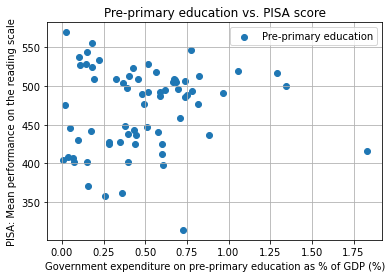

In [98]:
plt.scatter(pre_primary, pisa)
plt.xlabel('Government expenditure on pre-primary education as % of GDP (%)')
plt.ylabel('PISA: Mean performance on the reading scale')
plt.legend(['Pre-primary education'])
plt.title('Pre-primary education vs. PISA score')
plt.grid()
plt.show()

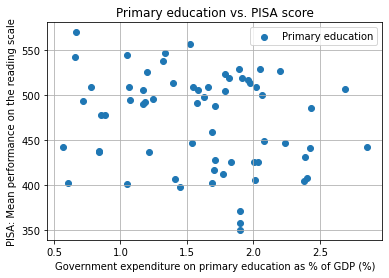

In [99]:
plt.scatter(primary, pisa)
plt.xlabel('Government expenditure on primary education as % of GDP (%)')
plt.ylabel('PISA: Mean performance on the reading scale')
plt.legend(['Primary education'])
plt.title('Primary education vs. PISA score')
plt.grid()
plt.show()

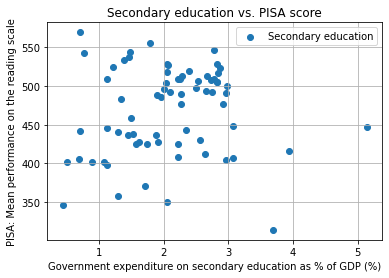

In [100]:
plt.scatter(secondary, pisa)
plt.xlabel('Government expenditure on secondary education as % of GDP (%)')
plt.ylabel('PISA: Mean performance on the reading scale')
plt.legend(['Secondary education'])
plt.title('Secondary education vs. PISA score')
plt.grid()
plt.show()

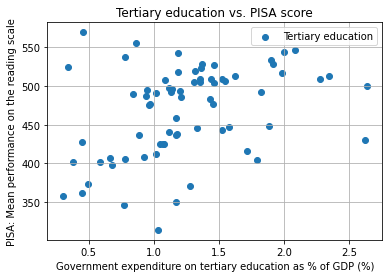

In [101]:
plt.scatter(tertiary, pisa)
plt.xlabel('Government expenditure on tertiary education as % of GDP (%)')
plt.ylabel('PISA: Mean performance on the reading scale')
plt.legend(['Tertiary education'])
plt.title('Tertiary education vs. PISA score')
plt.grid()
plt.show()

# Discussion:

# Conclusion: